In [2]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import numpy as np
import datetime
import pandas as pd
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import time
import glob
import os
import pytz
from tqdm import tqdm
import csv
import matplotlib.dates as mdates
import csv
import re
import os
from TMfunctions import *


In [3]:
#time .h5 for the swarm 
#for different data set, it has to be the time that is compared 

# Load the timestamps from the HDF5 file for the entire 7 days.
file_path = '/data/data4/veronica-scratch-rainier/swarm_august2023/results_CC_TMA/CC_1sec-templates/timestamps.h5'

# opening the file that containg the timestamps
with h5py.File(file_path, 'r') as f:
    timestamps_pt = np.array(f['timestamps'])

# Define the Pacific Timezone
pt_timezone = pytz.timezone('America/Los_Angeles')

# Convert timestamps from microseconds to seconds
timestamps_seconds = timestamps_pt / 1e6

# Convert timestamps to datetime objects in Pacific Time
datetime_objects_pt = [datetime.datetime.fromtimestamp(ts, pt_timezone) for ts in timestamps_seconds]

# Define the UTC Timezone
utc_timezone = pytz.timezone('UTC')

# Convert datetime objects to UTC
datetime_objects_utc = [dt_pt.astimezone(utc_timezone) for dt_pt in datetime_objects_pt]

# Redifining times variables
time_range = datetime_objects_utc



# Buiding outputfiles and correlations for each template on the list

In [4]:
# Directorio base donde se encuentran las carpetas
# Directory where you can fin the cc values in npy files

#base_directory = '/data/data4/veronica-scratch-rainier/test_corr'
base_directory = '/data/data4/veronica-scratch-rainier/swarm_august2023/results_CC_TMA/CC_3sec-templates'

# Obtener una lista de todas las carpetas en el directorio base
folders = [folder for folder in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, folder))]

# Inicializar una lista para almacenar los datos concatenados por cada carpeta
concatenated_data_per_folder = []

# Iterar sobre las carpetas y cargar los archivos .npy
for folder in folders:
    folder_path = os.path.join(base_directory, folder)
    npy_files = [np.load(os.path.join(folder_path, file)) for file in os.listdir(folder_path) if file.endswith('.npy')]
    concatenated_data_per_folder.append(np.concatenate(npy_files, axis=0))
    
# calcuting mad for each folder and for defining the thresold later
mads_per_folder = {}
for folder, folder_data in zip(folders, concatenated_data_per_folder):
    mad = np.median(np.abs(folder_data - np.median(folder_data)))
    mads_per_folder[folder] = mad
    print(f"MAD for folder {folder}: {mad}")
    
average_mad = np.mean(list(mads_per_folder.values()))

print(f"average mad {average_mad}")

# Asumiendo que ya tienes definido time_range adecuadamente

# Plot the cc values for each folder

#for i, folder_data in enumerate(concatenated_data_per_folder):
#    plt.figure(figsize=(10, 5))
#    plt.plot(time_range[0:len(folder_data)], folder_data, label=f'Folder {folders[i]}', color='blue', linestyle='-')
#    plt.axhline(y=0.02, color='red', linestyle='--') 
#    plt.title(f'Template {folders[i]}')
#    plt.xlabel('Time')
#    plt.ylabel('Correlation Value')
#    plt.legend()  # Agregar leyenda al gráfico
#    plt.ylim([0, 0.5])  # Establecer límites del eje y de 0 a 0.5

    # Guardar la figura como PNG
    # Save the figure as PNG
    
    # The output folder is where 
    #output_folder = '/data/data4/veronica-scratch-rainier/plot-TM-results/CC_plots' 
    #output_folder = '/data/data4/veronica-scratch-rainier/swarm_august2023/plot-TM-results/CC_plots-three-sec-templates'
    # Directorio de salida
    #if not os.path.exists(output_folder):
    #    os.makedirs(output_folder)
    #output_file_path = os.path.join(output_folder, f'corr_values_{folders[i]}.png')  # Ruta de salida
    #plt.savefig(output_file_path, dpi=300)  # Guardar la figura como PNG
    #plt.close()  # Cerrar la figura actual para evitar acumulación de figuras en memoria

#print("Proceso de creación de imágenes completado.")
#print("Process completed")


# add thresold and detections stuff

In [6]:
# Define los umbrales
# Defin thresolds
#thresholds = [0.5, 0.05, 0.04, 0.02]

# Directorio donde se guardarán los archivos CSV
#output_directory = "/home/velgueta/notebooks/RainierDas/csv_results_thresholds_3sec"

# Verificar y crear el directorio de salida principal si no existe
#if not os.path.exists(output_directory):
#    os.makedirs(output_directory)
    
# iterando por carpeta

#for folder, folder_data in zip(folders, concatenated_data_per_folder):
    
    # Crear directorio si no existe
#    folder_output_directory = os.path.join(output_directory, folder)
#    if not os.path.exists(folder_output_directory):
#        os.makedirs(folder_output_directory)
    
    # Ruta del archivo de salida
#    output_file_path = os.path.join(folder_output_directory, f"detections_results_{folder}.csv")
    
    # Abre el archivo de salida en modo escritura con la biblioteca CSV
#    with open(output_file_path, 'w', newline='') as csvfile:
        # Crea un escritor CSV
#        csv_writer = csv.writer(csvfile, delimiter=',')
        
        # Escribe los encabezados
#        csv_writer.writerow(["Threshold", "Number of Detections", "Detection Times (UTC)"])
        
        # Itera sobre cada umbral
#      for threshold in thresholds:
#            indices_above_threshold = np.where(np.abs(folder_data) > threshold)[0]
#            diff_indices = np.diff(indices_above_threshold)
#            group_changes = np.where(diff_indices > 10)[0]
#            detection_groups = np.split(indices_above_threshold, group_changes + 1)

#           for group in detection_groups:
#                if len(group) > 0:
#                    first_detection_time_utc = time_range[group[0]].strftime('%Y-%m-%d_%H.%M.%S')
#                    csv_writer.writerow([threshold, len(detection_groups), first_detection_time_utc])
#                else:
#                    print("Grupo vacío encontrado para el umbral:", threshold)

# Mensaje de confirmación
#print(f"Los resultados se han guardado en {output_directory}")

Grupo vacío encontrado para el umbral: 0.5
Grupo vacío encontrado para el umbral: 0.5
Los resultados se han guardado en /home/velgueta/notebooks/RainierDas/csv_results_thresholds_3sec


In [ ]:
#making a draft catalog for 0.04 thresold value
from datetime import datetime

# Directorio donde se guardarán los archivos CSV
output_directory = "/home/velgueta/notebooks/RainierDas/csv_results_thresholds_3sec"

# Umbral para el cual se buscarán valores repetidos en la tercera columna
target_threshold = average_mad*10

# Diccionario para almacenar los valores de tiempo por umbral
detection_times_per_threshold = {}

# Itera sobre cada carpeta
for folder in folders:
    # Ruta del archivo de salida
    output_file_path = os.path.join(output_directory, folder, f"detections_results_{folder}.csv")

    # Abre el archivo de salida en modo lectura con la biblioteca CSV
    with open(output_file_path, 'r', newline='') as file:
        reader = csv.reader(file, delimiter=',')
        
        # Ignora la primera fila (encabezado)
        next(reader)
        
        # Busca el valor repetido para el umbral especificado
        for row in reader:
            threshold, _, detection_time_utc = row
            if float(threshold) == target_threshold:
                if target_threshold not in detection_times_per_threshold:
                    detection_times_per_threshold[target_threshold] = set()
                detection_times_per_threshold[target_threshold].add(detection_time_utc)

# Diccionario para almacenar los valores únicos por umbral y tolerancia de tiempo
unique_detection_times_per_threshold = {}

# Itera sobre cada umbral y sus valores de tiempo
for threshold, detection_times in detection_times_per_threshold.items():
    unique_detection_times = set()
    for detection_time in detection_times:
        detection_time_obj = datetime.strptime(detection_time, '%Y-%m-%d_%H.%M.%S')
        # Verifica si hay valores dentro de una tolerancia de 3 segundos
        is_unique = True
        for unique_time in unique_detection_times:
            time_difference = abs((detection_time_obj - unique_time).total_seconds())
            if time_difference <= 4:
                is_unique = False
                break
        if is_unique:
            unique_detection_times.add(detection_time_obj)
    unique_detection_times_per_threshold[threshold] = unique_detection_times

# Guarda los valores únicos en un nuevo archivo CSV llamado "draftcatalog_3sec.csv"
draftcatalog_file_path = "draftcatalog_3sec.csv"

with open(draftcatalog_file_path, 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    for threshold, unique_detection_times in unique_detection_times_per_threshold.items():
        for detection_time in unique_detection_times:
            writer.writerow([threshold, detection_time.strftime('%Y-%m-%d_%H.%M.%S')])

print("Valores únicos guardados en 'draftcatalog_3sec.csv'.")

In [7]:
from datetime import datetime, timedelta

# Define the function to parse a date string into a datetime object
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, '%Y-%m-%d_%H.%M.%S')
    except ValueError:
        return None

# Define the time difference allowed (5 seconds)
time_difference = timedelta(seconds=6)

# Function to read dates and values from a file and return a list of tuples containing both
def read_dates_and_values_from_file(file_path):
    dates_and_values = []
    with open(file_path, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)  # Skip header line
        for row in reader:
            if len(row) >= 2:  # Ensure there are at least two elements
                value = row[0]  # Extract the value from the first column
                date_str = row[-1]  # Extract the date from the last column
                date = parse_date(date_str)
                if date is not None:
                    dates_and_values.append((value, date))
    return dates_and_values

# Read dates and values from the converted_dates_and_values_rainier_5days.csv file
converted_dates_and_values = read_dates_and_values_from_file('converted_dates_and_values_rainier_5days.csv')

# Initialize lists to store common dates and unmatched dates
common_dates = []
unmatched_dates = []

# Read dates from the draftcatalog_3sec.csv file and compare with converted dates
with open('draftcatalog_3sec.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)  # Skip header line
    for row in reader:
        threshold_value, result_date_str = row[:2]
        result_date = parse_date(result_date_str)  # Convert result date to a datetime object
        if result_date is not None:  # Check if result_date is not None
            # Check if the result_date has a match in converted_dates_and_values
            matched = False
            for value, converted_date in converted_dates_and_values:
                if abs(result_date - converted_date) <= time_difference:
                    common_dates.append((threshold_value, result_date, value))
                    matched = True
                    break
            if not matched:
                unmatched_dates.append((threshold_value, result_date))

# Write common and unmatched dates to the new output file
with open('matched_results_finalcatalog.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(["Threshold", "Result Date", "ID Value", "Match Status"])
    for threshold_value, result_date, id_value in common_dates:
        writer.writerow([threshold_value, result_date.strftime('%Y-%m-%d_%H.%M.%S'), id_value, "Matched"])
    for threshold_value, result_date in unmatched_dates:
        writer.writerow([threshold_value, result_date.strftime('%Y-%m-%d_%H.%M.%S'), "X", "Unmatched"])

print("Output file 'matched_results_finalcatalog.csv' has been generated.")


Output file 'matched_results_finalcatalog.csv' has been generated.


In [ ]:
#let's save the plots and cataloging matches or not and making figures for 
# Define paths and folders


# Define paths and folders
txt_file_path = '/home/velgueta/notebooks/RainierDas/Notebooks/matched_results_finalcatalog.csv'
files_folder_path = '/data/fast1/veronica-scratch-rainier-downsampling/drive1_ds'
plots_folder = '/data/data4/veronica-scratch-rainier/swarm_august2023/plot-TM-results/plots-newcatalog'

# Regular expression pattern to search for dates in the correct format
date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2})_(\d{2})\.(\d{2})')

# Extract information from output.txt
result_dates = []
thresholds = []
id_values = []
match_statuses = []

with open(txt_file_path, 'r') as txt_file:
    for line in txt_file:
        columns = line.strip().split('\t')
        threshold = columns[0]
        result_date = columns[1]
        id_value = columns[2]
        match_status = columns[3]
        result_dates.append(result_date)
        thresholds.append(threshold)
        id_values.append(id_value)
        match_statuses.append(match_status)

# Define the threshold to search

threshold_to_search = average_mad*10

# Create the folder for plots if it doesn't exist
if not os.path.exists(plots_folder):
    os.makedirs(plots_folder)

# Create a folder to hold all the plots
all_plots_folder = os.path.join(plots_folder, f'{threshold_to_search}_plots')
if not os.path.exists(all_plots_folder):
    os.makedirs(all_plots_folder)

# Iterate over the result dates and search for corresponding files with the specific threshold

for i, result_date in enumerate(result_dates):
    threshold = thresholds[i]
    id_value = id_values[i]
    match_status = match_statuses[i]
    match = date_pattern.match(result_date)
    if match:
        date_part = match.group(1)
        hour_part = match.group(2)
        minute_part = match.group(3)
        date_to_search = f"{date_part}_{hour_part}.{minute_part}"
        if threshold == threshold_to_search:
            found = False
            for file_name in os.listdir(files_folder_path):
                if date_to_search in file_name:
                    print(f"Found a file with the searched date: {file_name}")
                    found = True

                    # Process the found file
                    chan_min = 0
                    chan_max = -1
                    data_file_path = os.path.join(files_folder_path, file_name)
                    data_file = h5py.File(data_file_path, 'r')
                    this_data = np.array(data_file['Acquisition/Raw[0]/RawData'][:, chan_min:chan_max])
                    this_time = np.array(data_file['Acquisition/Raw[0]/RawDataTime'])
                    attrs = dict(data_file['Acquisition'].attrs)
                    data_file.close()

                    low_cut1 = 2
                    hi_cut1 = 9
                    fs = 20
                    b, a = butter(2, (low_cut1, hi_cut1), 'bp', fs=fs)
                    data_filt = filtfilt(b, a, this_data, axis=0)

                    date_format = mdates.DateFormatter('%H:%M:%S')
                    x_lims = mdates.date2num(this_time)
                    x_max = data_filt.shape[1] * attrs['SpatialSamplingInterval'] / 1000
                    dx = x_max / data_filt.shape[1]

                    fig, ax = plt.subplots(figsize=(20, 10))
                    plt.imshow(data_filt.T, cmap='seismic', aspect='auto', vmin=-0.05, vmax=0.05,
                               extent=[x_lims[0], x_lims[-1], x_max, 0])
                    plt.xlabel("Time UTC", fontsize=25)
                    plt.ylabel("Optical distance (km)", fontsize=25)
                    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
                    ax.xaxis_date()

                    # Set font size for time and channel axis labels
                    plt.xticks(fontsize=20)
                    plt.yticks(fontsize=20)

                    # Set title including threshold, ID value, and match status
                    plt.title(f'Threshold: {threshold}, ID: {id_value}, Match Status: {match_status}', fontsize=20)

                    # Save the plot in the all_plots_folder
                    full_path = os.path.join(all_plots_folder, f'{file_name}.png')
                    plt.savefig(full_path, dpi=300, bbox_inches='tight')
                    plt.close(fig)
                    break

            if not found:
                print(f"No matching file found for the searched date: {date_to_search}")


# plots of the catalog

In [ ]:

# Ruta de la carpeta que contiene las imágenes PNG
#folder_path = '/data/data4/veronica-scratch-rainier/plot-TM-results/plots-newcatalog/0.045_plots'

# Obtener la lista de archivos en la carpeta
#image_files = os.listdir(folder_path)

# Configurar el tamaño de la figura y el número de columnas para mostrar las imágenes
#fig, axs = plt.subplots(nrows=len(image_files) // 3 + 1, ncols=3, figsize=(15, 5 * (len(image_files) // 3 + 1)))

# Iterar sobre los archivos de imagen y mostrar cada una en su respectivo subplot
#for i, image_file in enumerate(image_files):
    # Calcular las coordenadas del subplot
#    row = i // 3
#    col = i % 3
    
    # Ruta completa de la imagen
#    image_path = os.path.join(folder_path, image_file)
    
    # Mostrar la imagen en el subplot correspondiente
#    if os.path.isfile(image_path):
#        image = plt.imread(image_path)
#        axs[row, col].imshow(image)
#        axs[row, col].axis('off')
#        axs[row, col].set_title(image_file)

# Ajustar el espaciado entre los subplots y mostrar la figura
#plt.tight_layout()
#plt.show()


# MAD and detections

In [8]:
#parker fuctions/slack fuctions


# Parker functions
def mad_func_li(arr):
    """ Median Absolute Deviation: Using the formulation in Li and Zhan 2018
    Pushing the limit of earthquake detection with DAS and template matching
    """
    mean = np.mean(arr)
    med = np.median(arr)
    return np.median(np.abs(mean - med))

def mad_func_shelly(arr):
    """ Median Absolute Deviation: Using the formulation in Shelly 2007
    Pushing the limit of earthquake detection with DAS and template matching
    """
    med = np.median(arr)
    return np.median(np.abs(arr - med))

def detections(cc_arr, mode='shelly'):
    """ using detection significance from Li and Zhan 2018
    det = (peak - med) / mad
    """
    med = np.median(cc_arr)
    if mode == 'shelly':
        mad = mad_func_shelly(cc_arr)
    elif mode == 'li':
        mad = mad_func_li(cc_arr)

    det = (cc_arr - med) / mad
    return det, mad

In [ ]:

# Obtener una lista de todas las carpetas en el directorio base
#folders = [folder for folder in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, folder))]

# Inicializar una lista para almacenar los datos concatenados por cada carpeta
#concatenated_data_per_folder = []

# Iterar sobre las carpetas y cargar los archivos .npy
#for folder in folders:
#    folder_path = os.path.join(base_directory, folder)
#    npy_files = [np.load(os.path.join(folder_path, file)) for file in os.listdir(folder_path) if file.endswith('.npy')]
#    concatenated_data_per_folder.append(np.concatenate(npy_files, axis=0))

# Calcular detecciones y trazar los resultados
#fig, axs = plt.subplots(len(folders), 1, figsize=(10, 5*len(folders)))

#for i, (folder, folder_data) in enumerate(zip(folders, concatenated_data_per_folder)):
#    det_shelly, mad = detections(folder_data, mode='shelly')
#    axs[i].plot(det_shelly, label=f'Folder {folder}', color='blue')
#    axs[i].set_title(f'Detecciones Shelly - {folder}')
#    axs[i].set_xlabel('Time')
#    axs[i].set_ylabel('Detecciones')
#    axs[i].legend()  # Agregar leyenda a cada subplot
#    axs[i].set_ylim(-30,30)

#plt.tight_layout()
#plt.show()


In [ ]:
#queremos clcular el thresold based on MAD, it seems acceptable try between 3 times MAD to 6 times


# getting the histograms for each folder

In [ ]:
# Calcular detecciones y graficar los resultados
fig, axs = plt.subplots(len(folders), 2, figsize=(15, 5*len(folders)))  # 2 subplots per folder: one for detections, one for MAD histogram

for i, (folder, folder_data) in enumerate(zip(folders, concatenated_data_per_folder)):
    det_shelly, mad = detections(folder_data, mode='shelly')

    # Plot detections
    axs[i, 0].plot(det_shelly, label=f'Folder {folder}', color='blue')
    axs[i, 0].set_title(f'Detecciones Shelly - {folder}')
    axs[i, 0].set_xlabel('Tiempo')
    axs[i, 0].set_ylabel('Detecciones')
    axs[i, 0].legend()

    # Plot MAD histogram
    axs[i, 1].hist(mad, bins=30, color='green', alpha=0.7)
    axs[i, 1].set_title(f'Histogram of MAD - {folder}')
    axs[i, 1].set_xlabel('MAD')
    axs[i, 1].set_ylabel('Frecuency')

plt.tight_layout()
plt.show()


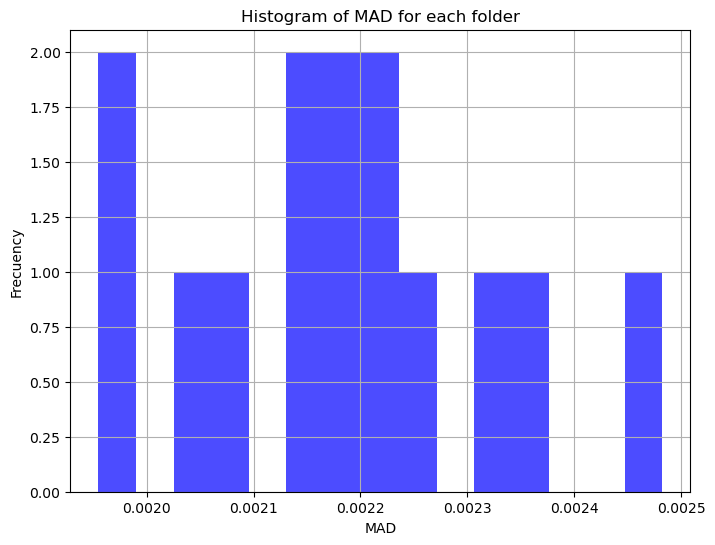

In [42]:
mads_values = list(mads_per_folder.values())

# Crea el histograma de los valores de MAD
plt.figure(figsize=(8, 6))
plt.hist(mads_values, bins=15, color='blue', alpha=0.7)

# Añade etiquetas y títulos
plt.xlabel('MAD')
plt.ylabel('Frecuency')
plt.title('Histogram of MAD for each folder')

# Muestra el histograma
# show the histogram
plt.grid(True)
plt.show()